In [7]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 24.5 MB/s 


In [8]:
import mne
import matplotlib.pyplot as plt


In [16]:
pwd

'/content'

In [9]:
#Read in raw data

In [17]:
fname = 'oddball_example_small-fif'

In [18]:
raw = mne.io.read_raw_fif(fname)

Opening raw data file oddball_example_small-fif...
Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.


<ipython-input-18-78767f98f250>:1: RuntimeWarning: This filename (oddball_example_small-fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname)


In [ ]:
# helper information
dir(raw)

In [ ]:
# helper information
raw.crop?

In [ ]:
raw.filter?

In [ ]:
# by default, MNE does not store raw and epochs objects in memory

In [19]:
raw = mne.io.read_raw_fif(fname, preload = True)

Opening raw data file oddball_example_small-fif...
Isotrak not found
    Range : 2903 ... 112000 =     29.030 ...  1120.000 secs
Ready.
Reading 0 ... 109097  =      0.000 ...  1090.970 secs...


<ipython-input-19-015d28cac644>:1: RuntimeWarning: This filename (oddball_example_small-fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload = True)


In [20]:
raw.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 331 samples (3.310 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.4s finished


<Raw | oddball_example_small-fif, 64 x 109098 (1091.0 s), ~53.3 MB, data loaded>

Using matplotlib as 2D backend.


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


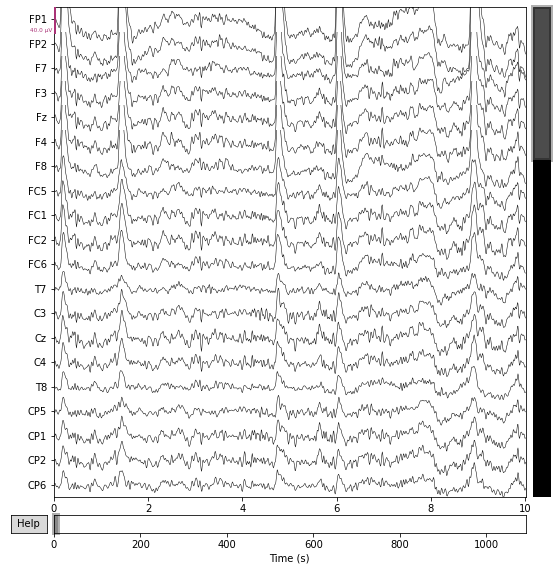

In [21]:
raw.plot();

In [ ]:
# there are many eog arefacts. We will use ICA to correct. Create ICA object and use its .fit method

In [25]:
ica = mne.preprocessing.ICA(n_components = 20, random_state = 42)

In [26]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 165 samples (1.650 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 63 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.6s finished


Selecting by number: 20 components
Fitting ICA took 4.6s.


Method,fastica
Fit,31 iterations on raw data (109098 samples)
ICA components,20
Available PCA components,63
Channel types,eeg
ICA components marked for exclusion,—


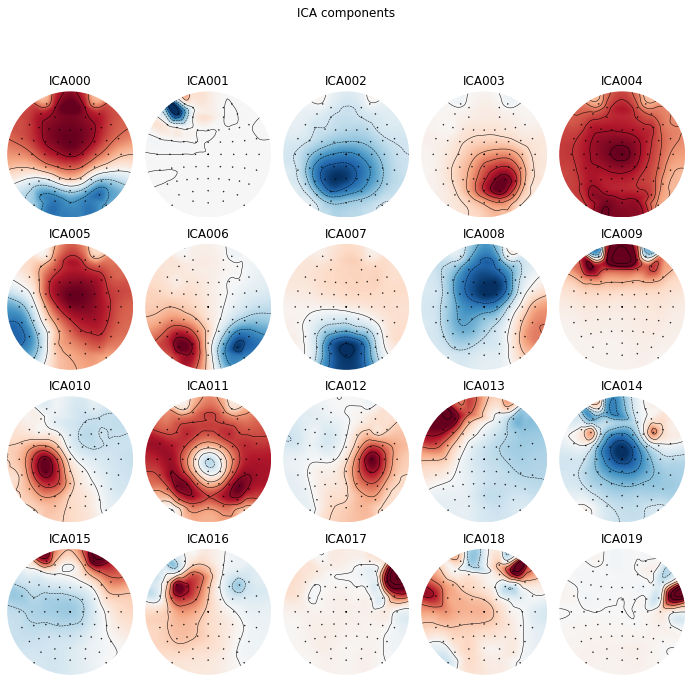

In [27]:
ica.plot_components(outlines = 'skirt');

In [28]:
# store the 'bad' components in the ica object

ica.exclude = [1, 10, 14, 17, 18, 19]

In [29]:
bad_idx, scores = ica.find_bads_eog(raw, 'SO2', threshold = 2)
print(bad_idx)

Using EOG channel: SO2
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1000 samples (10.000 sec)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


[15, 9, 14]


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


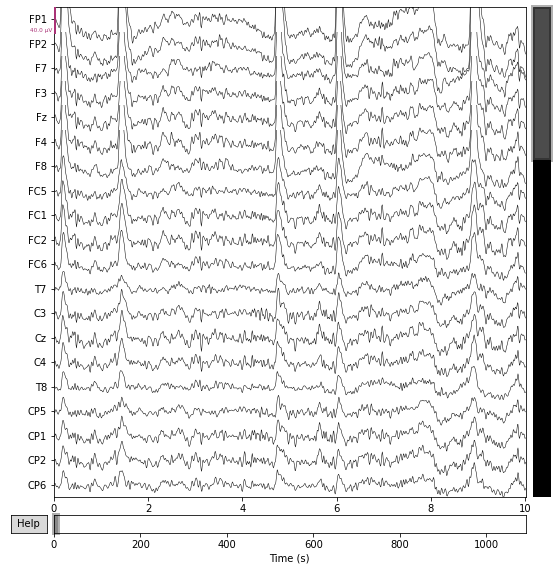

In [30]:
# compare raw and adjusted data

raw.plot();

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


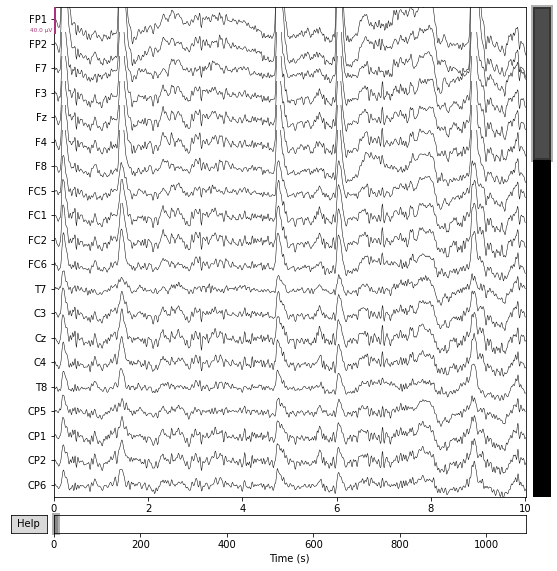

In [31]:
ica.apply(raw.copy(), exclude = ica.exclude).plot();

In [ ]:
# epochs

In [ ]:
# for epoching the data, we need event markers, usually, these are stored in the raw object, in mne, in a stimulus channel

In [32]:
events = mne.find_events(raw)

903 events found
Event IDs: [100 200]


In [ ]:
# events is an array*time in sampes, zero, trigger)

In [ ]:
events

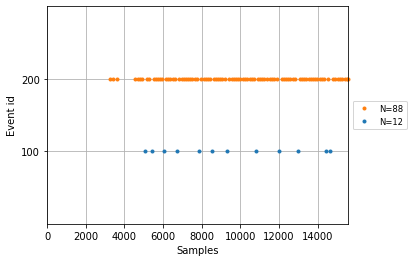

In [33]:
mne.viz.plot_events(events[:100]);

In [ ]:
# for creating an mne.Epochs object, we require a dictionary of the intended condition names and the corresponding trigger numbers

In [34]:
event_ids = {'standard/stimulus': 200, 'target/stimulus': 100}

epochs = mne.Epochs(raw, events, event_id = event_ids)

Not setting metadata
903 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Using data from preloaded Raw for 903 events and 71 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 20 events and 71 original time points ...


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


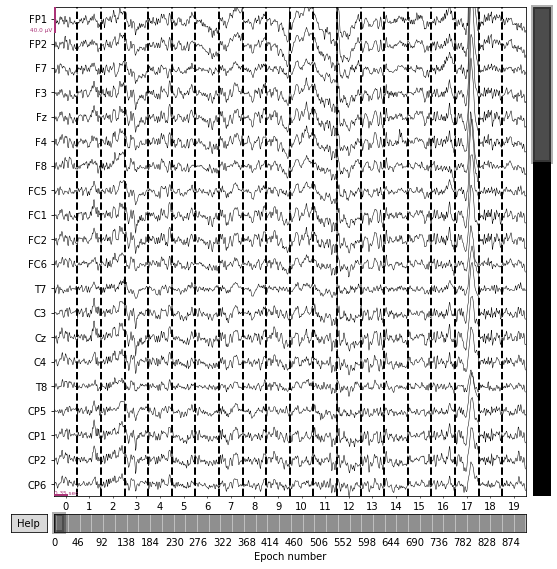

In [35]:
epochs.plot();

In [36]:
epochs = ica.apply(epochs.load_data(), exclude = ica.exclude)

Using data from preloaded Raw for 903 events and 71 original time points ...
Applying ICA to Epochs instance
    Transforming to ICA space (20 components)
    Zeroing out 6 ICA components
    Projecting back using 63 PCA components


<ipython-input-36-2e28a7aab827>:1: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs = ica.apply(epochs.load_data(), exclude = ica.exclude)


In [37]:
epochs.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


Number of events,903
Events,standard/stimulus: 797target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [ ]:
# how does the epoched avtivity looks like?

In [38]:
epochs.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


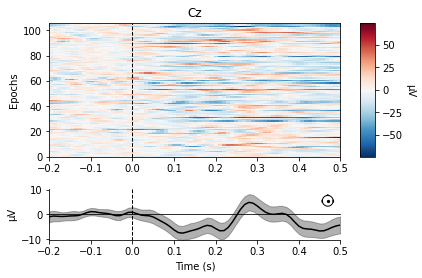

[<Figure size 432x288 with 4 Axes>]

In [39]:
epochs['target'].plot_image(picks = [13])

Not setting metadata
903 matching events found
No baseline correction applied
0 projection items activated


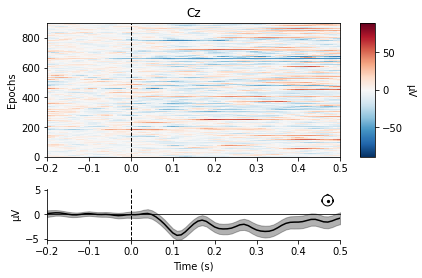

[<Figure size 432x288 with 4 Axes>]

In [40]:
epochs['stimulus'].plot_image(picks = [13])

Not setting metadata
106 matching events found
No baseline correction applied
0 projection items activated


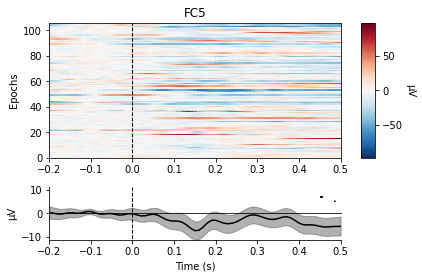

[<Figure size 432x288 with 4 Axes>]

In [41]:
epochs['target'].plot_image(picks = [7])

In [ ]:
# to ensure we have as many Oddball as standard trails, we can run...

In [42]:
epochs.equalize_event_counts(event_ids)

# standard = target

Dropped 691 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 12, 13, 14, 15, 18, 19, 20, 21, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36, 39, 40, 41, 42, 43, 44, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188, 193, 194, 197, 198, 199, 200, 201, 202, 203, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 248, 249, 252, 253, 254, 257, 260, 261, 262, 263, 266, 267, 268, 269, 270, 271, 274, 275, 276, 277, 278, 279, 280,

(<Epochs |  212 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~7.4 MB, data loaded,
  'standard/stimulus': 106
  'target/stimulus': 106>,
 array([  0,   1,   2,   3,   4,   5,   6,   9,  12,  13,  14,  15,  18,
         19,  20,  21,  24,  25,  26,  27,  28,  29,  30,  33,  34,  35,
         36,  39,  40,  41,  42,  43,  44,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  59,  60,  61,  62,  63,  64,  65,  66,  69,
         70,  71,  72,  73,  74,  75,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
        104, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 121, 122,
        123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 141, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171,
        172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 187, 188,
        193, 194, 197, 198, 199, 200, 201, 202,

In [ ]:
# write the epochs to disk 

In [43]:
epochs.save('oddball-epo.fif')   # cleared bad ic

In [ ]:
X = epochs.get_data()

In [ ]:
X.shape

In [ ]:
type(X)

In [44]:
epochs['target'].get_data().shape

(106, 64, 71)

In [45]:
%matplotlib inline
import mne
import matplotlib.pyplot as plt


In [47]:
fname = 'oddball-epo.fif'
epochs = mne.read_epochs(fname)

Reading /content/oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [50]:
epochs.get_data()

array([[[-9.30380989e-07, -1.54432839e-06,  2.04822430e-06, ...,
          1.68087531e-05,  1.87635628e-05,  2.07859531e-05],
        [-1.45777424e-06, -1.93787440e-06,  1.84897984e-06, ...,
          1.74642965e-05,  1.84927924e-05,  1.81584520e-05],
        [-3.42214958e-06, -4.32672538e-06, -1.95786491e-06, ...,
          5.17649686e-06,  4.55677880e-06,  5.14839529e-06],
        ...,
        [ 7.76652462e-06,  3.77344082e-06, -9.06420896e-07, ...,
         -1.37868358e-06, -1.27527867e-06, -1.14309771e-06],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.19310458e-06, -3.56756618e-06,  3.14902240e-06, ...,
          2.16069975e-06,  3.49814718e-06,  2.24718042e-06]],

       [[ 1.02388614e-06,  4.96959263e-06,  3.67460640e-06, ...,
          1.03808257e-05,  9.39420584e-06,  6.37512431e-06],
        [-2.08913483e-06,  2.10380425e-06,  2.19027901e-06, ...,
          1.19910039e-05,  1.08793932e

In [51]:
epochs

Number of events,212
Events,standard/stimulus: 106target/stimulus: 106
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [ ]:
# Evoked

# # finnaly, if we average an epoched dataset over trials, we can use the mne.evoked object

In [52]:
target = epochs['target'].average()
target

<Evoked | 'target/stimulus' (average, N=106), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 63 ch, ~103 kB>

In [53]:
standard = epochs['standard'].average()
standard

<Evoked | 'standard/stimulus' (average, N=106), -0.2 – 0.5 sec, baseline -0.2 – 0 sec, 63 ch, ~103 kB>

In [57]:
epochs.get_data().shape   # all data inlcudes standards and target

(212, 64, 71)

In [56]:
epochs['target'].get_data().shape  # 

(106, 64, 71)

In [59]:
# average target

target.data.shape

(63, 71)

In [60]:
target.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 63
 projs: []
 sfreq: 100.0 Hz
>

In [62]:
dir(target)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_aspect_kind',
 '_data',
 '_decim',
 '_get_channel_positions',
 '_handle_tmin_tmax',
 '_pick_drop_channels',
 '_pick_projs',
 '_projector',
 '_raw_times',
 '_reconstruct_proj',
 '_repr_html_',
 '_set_channel_positions',
 '_set_legacy_nfft_default',
 '_set_times',
 '_size',
 '_times_readonly',
 '_update_first_last',
 'add_channels',
 'add_proj',
 'add_reference_channels',
 'animate_topomap',
 'anonymize',
 'apply_baseline',
 'apply_function',
 'apply_hilbert',
 'apply_proj',
 'as_type',
 'baseline',
 'ch_names',
 'comment',
 'compensation_grade',
 'compute_psd',
 'copy',
 'cr

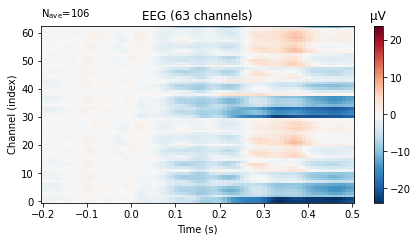

In [69]:
target.plot_image();

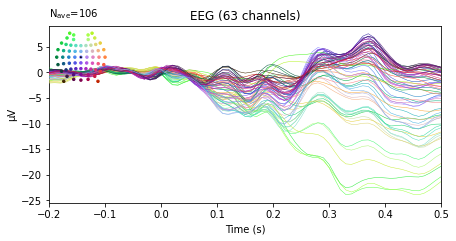

In [74]:
target.plot();  # Average ERP FROM 106 trails, 

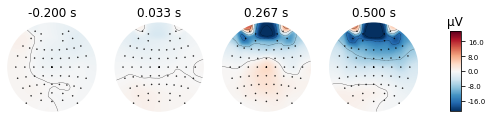

In [72]:
target.plot_topomap();

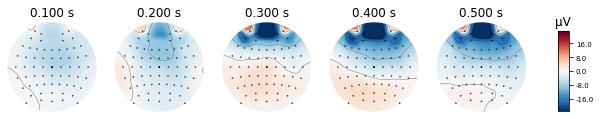

In [75]:
target.plot_topomap(times = [0.1, 0.2, 0.3, 0.4, 0.5]);  # specific times lines

No projector specified for this dataset. Please consider the method self.add_proj.


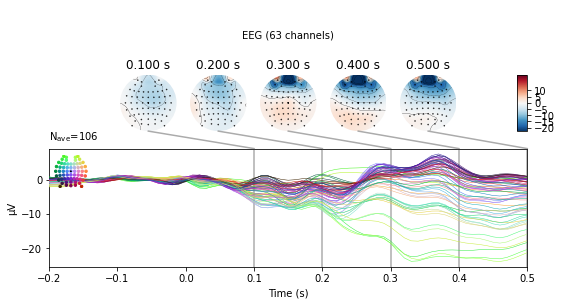

In [77]:
target.plot_joint(times = [0.1, 0.2, 0.3, 0.4, 0.5]);   # target plot + topomap 

No projector specified for this dataset. Please consider the method self.add_proj.


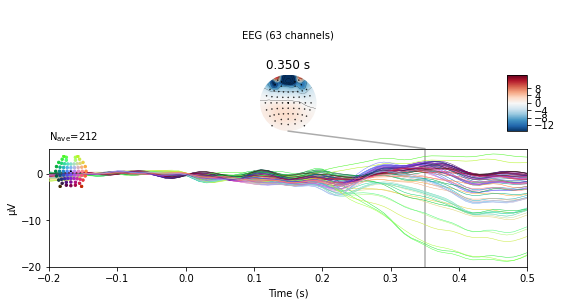

In [80]:
# for condition contrasts, use mne.comibne.evoked

diff = mne.combine_evoked((target, -standard), weights ='equal')
diff.plot_joint(times = .35);

In [81]:
# 10/20 electrode layout, we can use nicer layerout

rois = mne.channels.make_1020_channel_selections(diff.info, midline = 'z12')

In [82]:
rois  # lef, midline, right channels

{'Left': array([25, 57, 58, 20, 53, 21, 48, 16, 49, 12, 44, 11, 40,  7, 39,  3, 34,
         2, 31, 30]),
 'Midline': array([27, 28, 26, 59, 54, 55, 22, 17, 18, 50, 46, 13, 45, 62,  9,  8,  4,
        36, 35,  1,  0, 38, 43]),
 'Right': array([29, 61, 60, 24, 56, 23, 52, 19, 51, 14, 15, 47, 41, 10, 42,  5, 37,
         6, 32, 33])}

[<Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>,
 <Figure size 432x288 with 2 Axes>]

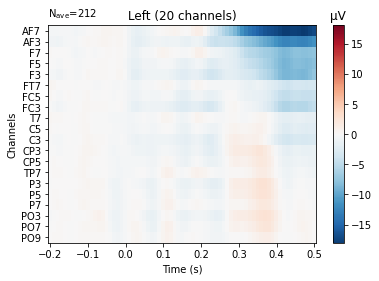

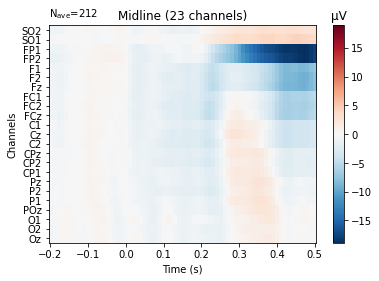

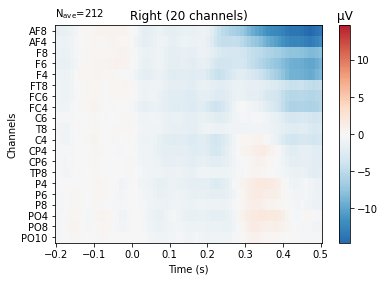

In [83]:
diff.plot_image(group_by = rois, show = False, show_names = 'all')

combining channels using "mean"
combining channels using "mean"


<ipython-input-107-e255a936d62a>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  'target': target}, picks=[13], combine=combine);


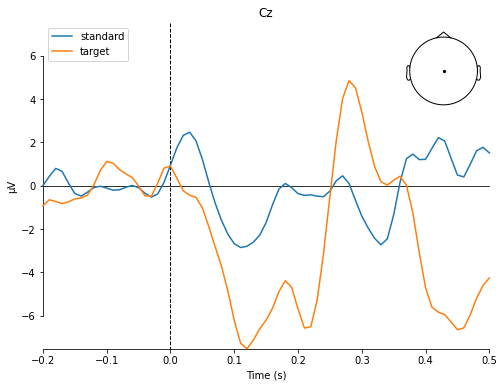

combining channels using "median"
combining channels using "median"


<ipython-input-107-e255a936d62a>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "median".
  'target': target}, picks=[13], combine=combine);


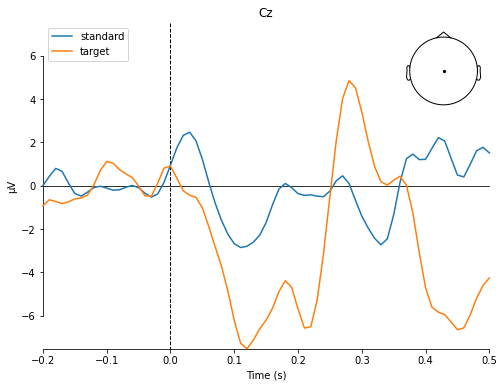

combining channels using "gfp"
combining channels using "gfp"


<ipython-input-107-e255a936d62a>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "gfp".
  'target': target}, picks=[13], combine=combine);


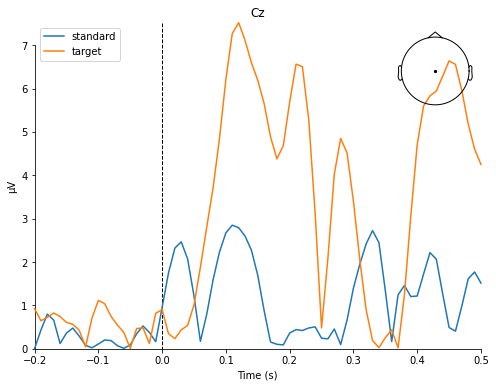

combining channels using "<function custom_func at 0x7f02aa71e200>"
combining channels using "<function custom_func at 0x7f02aa71e200>"


<ipython-input-107-e255a936d62a>:7: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "<function custom_func at 0x7f02aa71e200>".
  'target': target}, picks=[13], combine=combine);


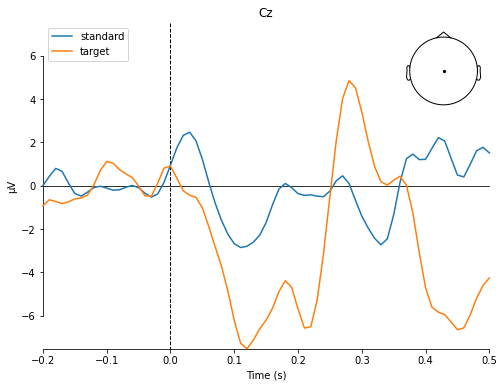

In [107]:
# mne.viz.plot_compareevoked to contrast multiple conditions
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds({'standard': standard,
                            'target': target}, picks=[13], combine=combine);

In [ ]:
# Visualize all target data

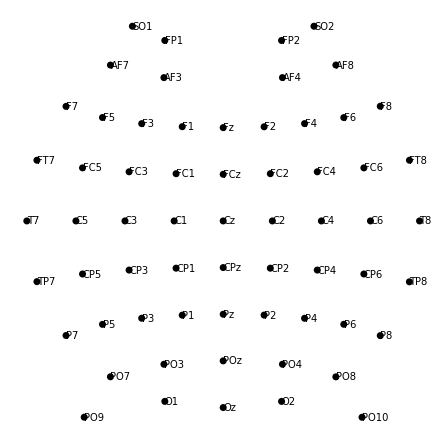

In [116]:
target.plot_sensors(show_names = True);

In [118]:
target.data

array([[-4.50424214e-07, -6.47094747e-07, -7.07256720e-07, ...,
        -2.19922717e-05, -2.11621019e-05, -2.04054069e-05],
       [-1.47543483e-06, -1.53949726e-06, -1.56845099e-06, ...,
        -2.29729572e-05, -2.21747029e-05, -2.13486720e-05],
       [ 8.68491160e-07,  4.61180846e-07,  3.22323983e-07, ...,
        -8.82081462e-06, -8.47868443e-06, -8.29150726e-06],
       ...,
       [-9.40741114e-08,  2.38647367e-07,  3.89680687e-07, ...,
         1.21894660e-06,  7.68929545e-07,  2.62164119e-07],
       [-1.11043769e-07,  7.18254973e-08,  2.32725890e-07, ...,
         2.58486289e-07, -1.95749523e-07, -5.68722653e-07],
       [-1.43624481e-06, -1.30111706e-06, -1.38886878e-06, ...,
        -9.52759590e-06, -8.75040899e-06, -8.38388048e-06]])

In [119]:
x = target.data

In [121]:
ch_names = target.info['ch_names']
ch_names

['FP1',
 'FP2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'PO9',
 'O1',
 'Oz',
 'O2',
 'PO10',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'SO1',
 'FT7',
 'FC3',
 'FC4',
 'FT8',
 'SO2',
 'C5',
 'C1',
 'C2',
 'C6',
 'TP7',
 'CP3',
 'CPz',
 'CP4',
 'TP8',
 'P5',
 'P1',
 'P2',
 'P6',
 'PO7',
 'PO3',
 'POz',
 'PO4',
 'PO8',
 'FCz']

In [127]:
channel = 'C4'
chIndex = [i for i, j in enumerate(ch_names) if j == channel]

Text(0.5, 0, 'time ')

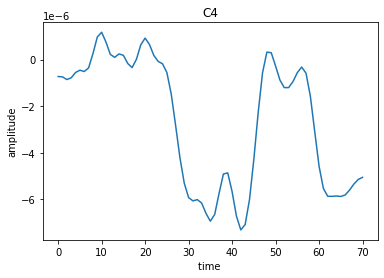

In [128]:
plt.plot(x[chIndex[0], :])
plt.title(channel)
plt.ylabel('amplitude')
plt.xlabel('time ')
plt.show();

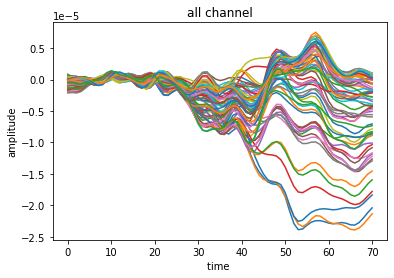

In [132]:
# visualize all channel
plt.plot(x.T)
plt.title('all channel')
plt.ylabel('amplitude')
plt.xlabel('time ')
plt.show();

## Time-Frequency topic





In [135]:
epochs_for_tfr = mne.read_epochs('oddball-epo.fif')

Reading /content/oddball-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -200.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
212 matching events found
No baseline correction applied
0 projection items activated


In [139]:
epochs_for_tfr.info

<Info | 10 non-empty values
 bads: []
 ch_names: FP1, FP2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 63 EEG, 1 Stimulus
 custom_ref_applied: True
 file_id: 4 items (dict)
 highpass: 1.0 Hz
 lowpass: 20.0 Hz
 meas_date: 2017-08-10 20:05:16 UTC
 meas_id: 4 items (dict)
 nchan: 64
 projs: []
 sfreq: 100.0 Hz
>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


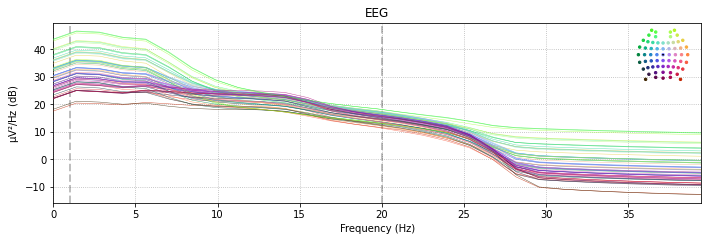

In [138]:
epochs_for_tfr.plot_psd(fmin = 0, fmax = 40);   # hz

In [140]:
# correlation between time/frequency and oddball effect
# extract power per time and frequency with morlet wavelets

from mne.time_frequency import tfr_morlet  # decompose time and frequency

In [163]:
freqs = list(range(8, 30))

tfr_target = tfr_morlet(epochs_for_tfr['target'], freqs, 3, return_itc = False) 
tfr_standard = tfr_morlet(epochs_for_tfr['standard'], freqs, 3, return_itc = False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.6s finished


In [164]:
tfr_target.data.shape

(63, 22, 71)

In [165]:
# time-frequency data is stored in tfr, behave like evoked

tfr_contrast = mne.combine_evoked((tfr_standard, tfr_target), (-5, .5))

tfr_contrast.apply_baseline((None, 0))

Applying baseline correction (mode: mean)


<AverageTFR | time : [-0.200000, 0.500000], freq : [8.000000, 29.000000], nave : 4, channels : 63, ~837 kB>

No baseline correction applied
No baseline correction applied


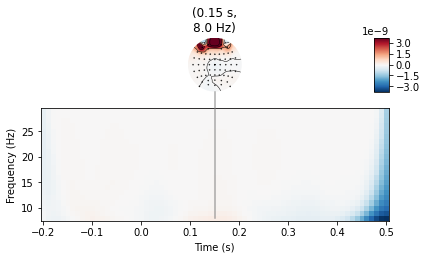

In [168]:
# plot time-freuqncy activity(event-related specitral perturbations):: observe the alpha-band ERD and the time-frequency corerlation of the P3 effect

tfr_contrast.plot_joint();

No baseline correction applied


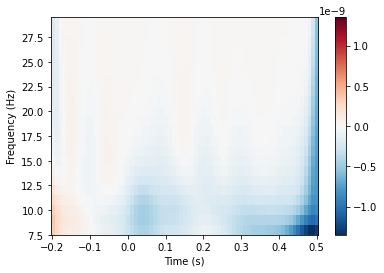

[<Figure size 432x288 with 2 Axes>]

In [171]:
tfr_contrast.plot(picks=[13])